In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv', index_col=None)

In [3]:
# Exploratory data analysis
# Checking for data completeness
data['year'] = pd.DatetimeIndex(data['period']).year
rows_count = data.groupby('year', as_index=False).year.value_counts()
rows_count.columns=['year','reviews']

In [4]:
rows_count

,year,reviews
0,1990,181
1,1991,204
2,1992,197
3,1993,202
4,1994,201
5,1995,210
6,1996,196
7,1997,203
8,1998,199
9,1999,208


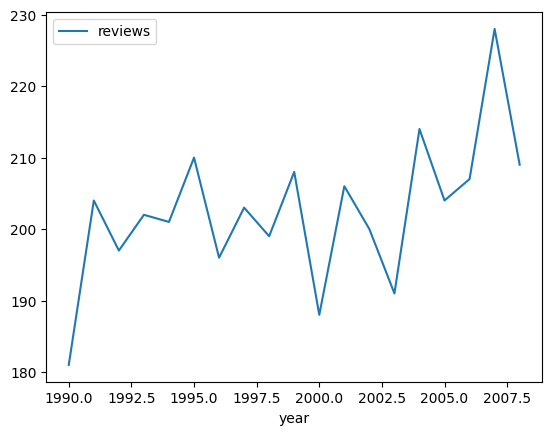

In [5]:
import matplotlib.pyplot as plt

rows_count.plot.line(x='year',y = 'reviews')
plt.show()

In [6]:
# Checking for letter-to-other characters ratio
import re

In [7]:
# convert product reviews to a single string
text = pd.Series.to_string(data['text'], index = False)

# remove newline characters
text = re.sub('\n', '', text)

# calculate sum of numbers, letters, and spaces
numbers = sum(c.isdigit() for c in text)
letters = sum(c.isalpha() for c in text)
spaces  = sum(c.isspace() for c in text)
others  = len(text) - numbers - letters - spaces

In [8]:
# calculate metrics
dirtiness = ((numbers + others) / len(text)) * 100
cleanness = ((letters + spaces) / len(text)) * 100

In [9]:
dirtiness

8.774948024948024

In [10]:
cleanness

91.22505197505197

C:\Users\Petr\anaconda3\lib\site-packages\arabica\group.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


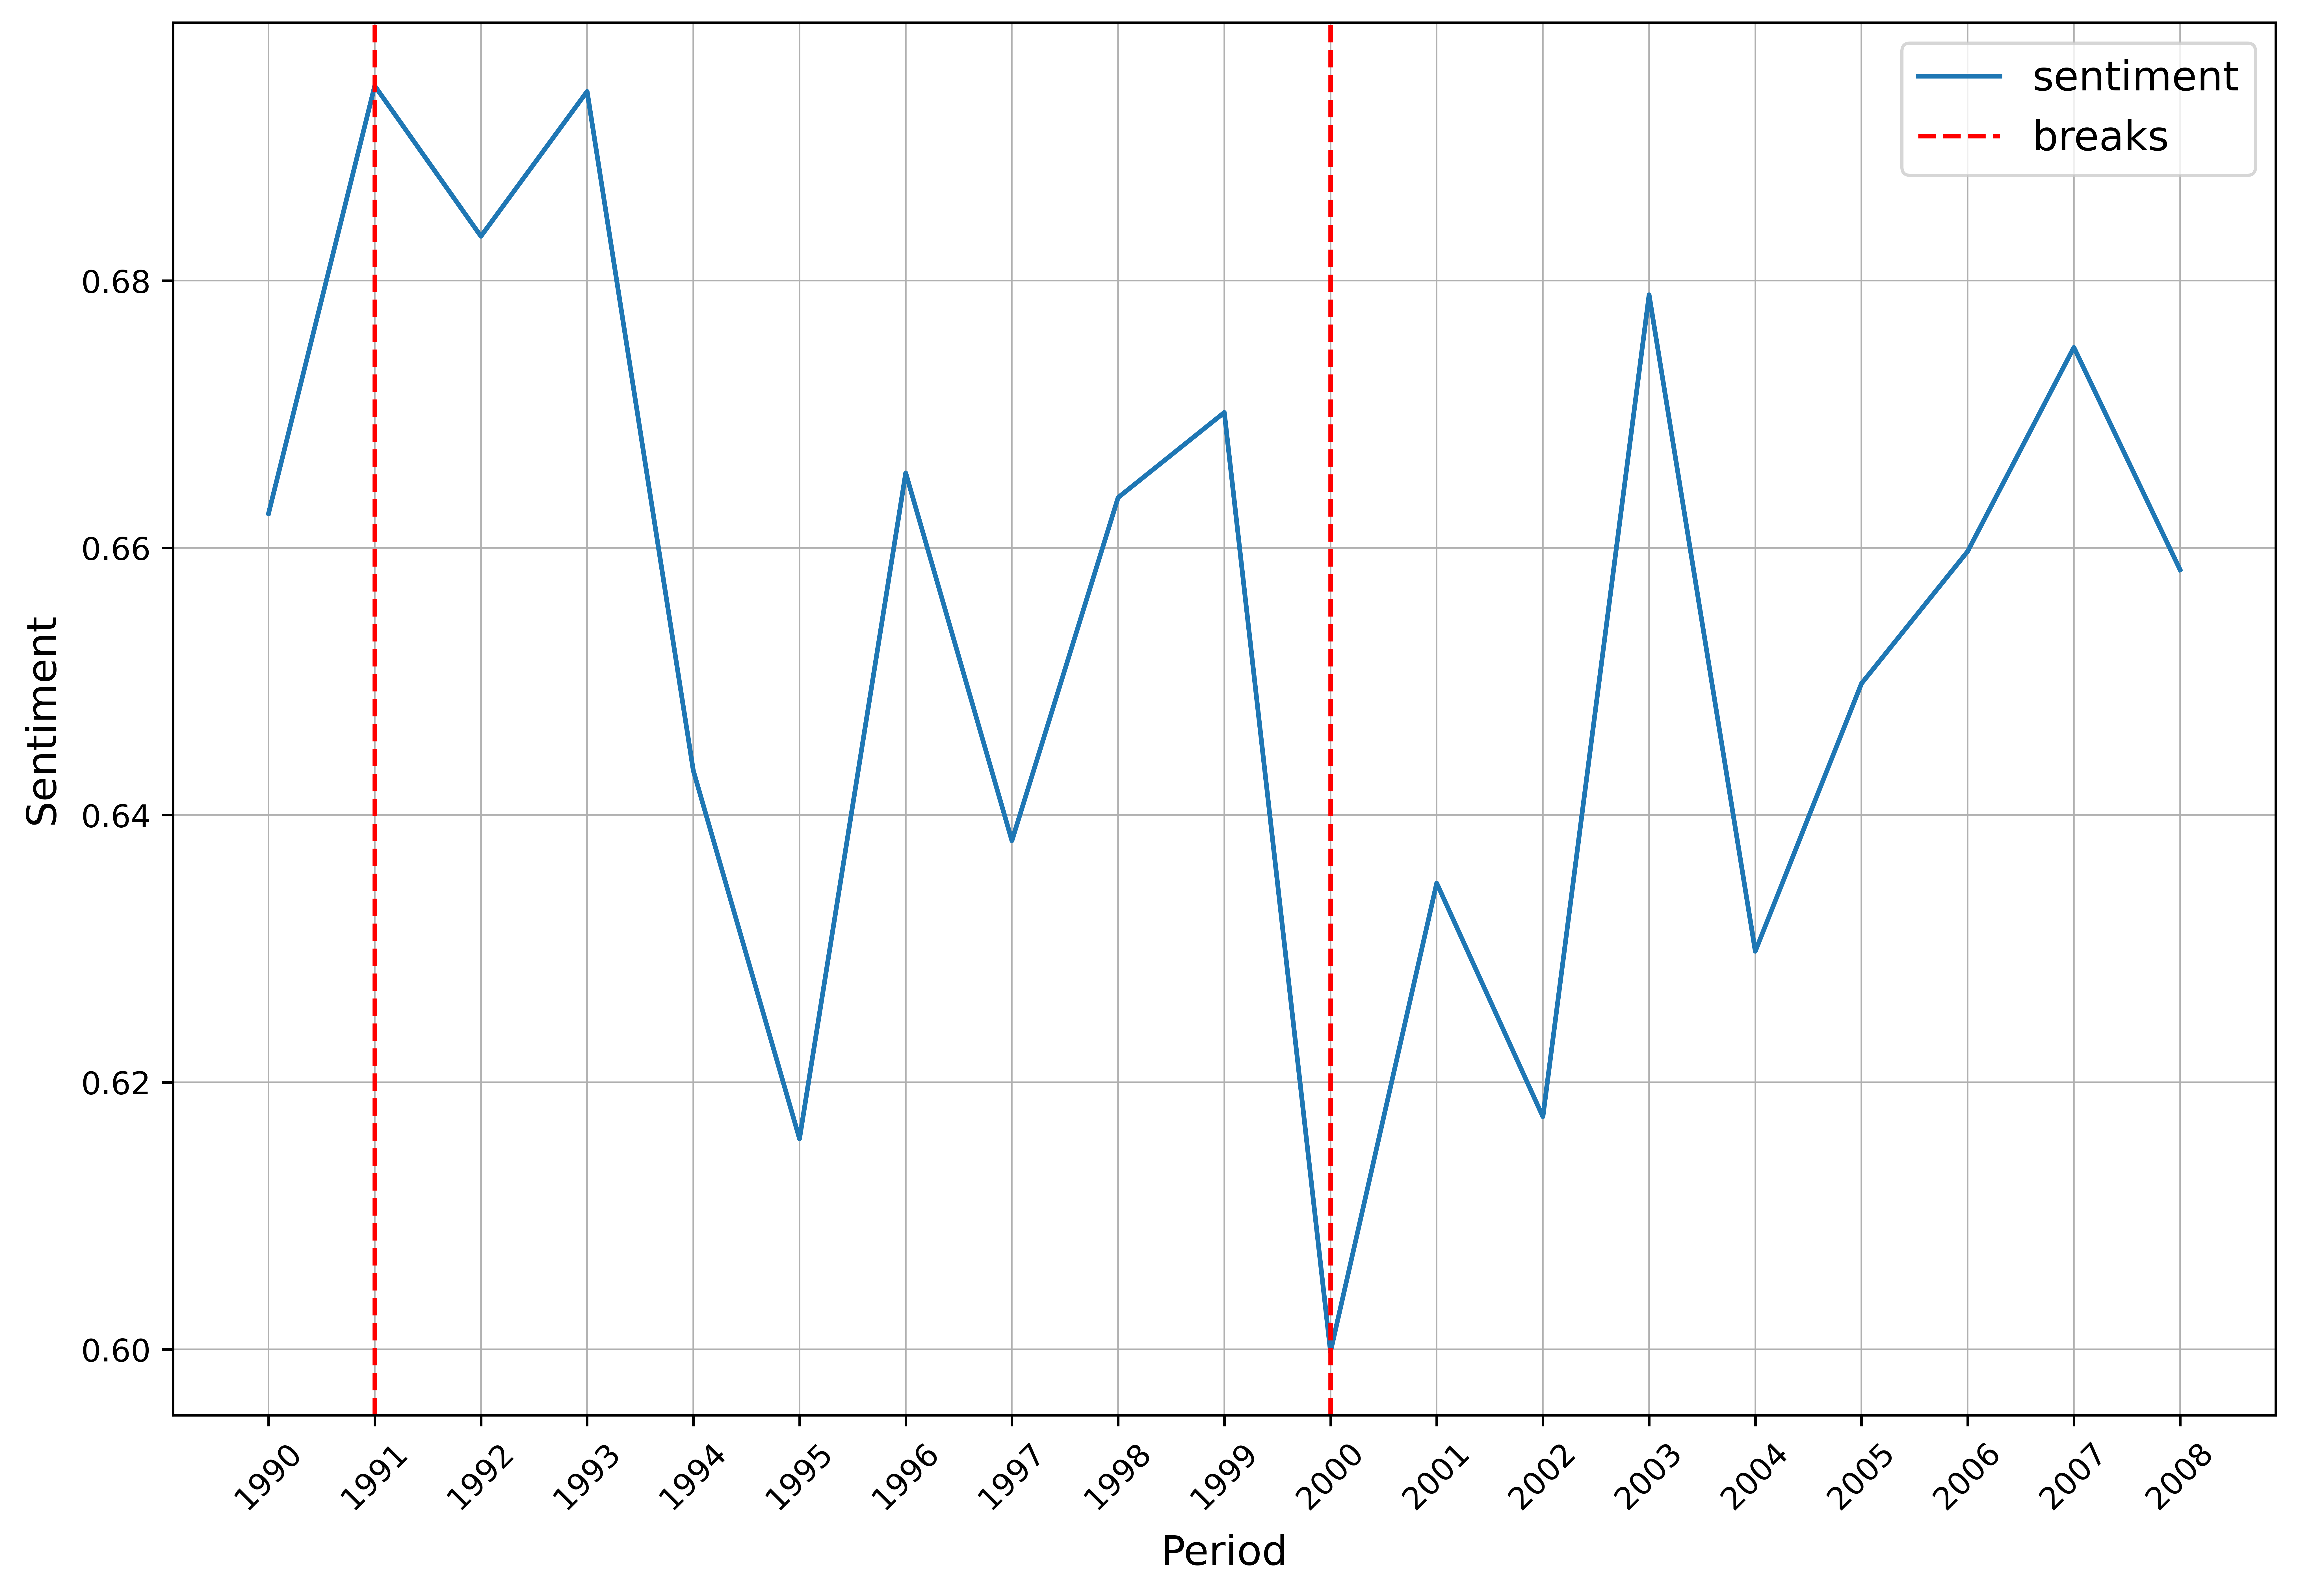

,sentiment
period,
1990,0.662572
1991,0.694585
1992,0.683324
1993,0.694168
1994,0.643326
1995,0.615765
1996,0.665610
1997,0.638076
1998,0.663764


In [13]:
# Sentiment analysis with breakpoins

from arabica import coffee_break

coffee_break(text = data['text'],
             time = data['period'],
             date_format = 'us',   # Read dates in European format
             preprocess = True,    # Clean data - digits and punctuation
             skip = None,          # Remove additional unwanted strings
             n_breaks = 2,         # No structural break analysis
             time_freq = 'Y')      # Yearly aggregation

C:\Users\Petr\anaconda3\lib\site-packages\arabica\arabica_freq.py:68: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])


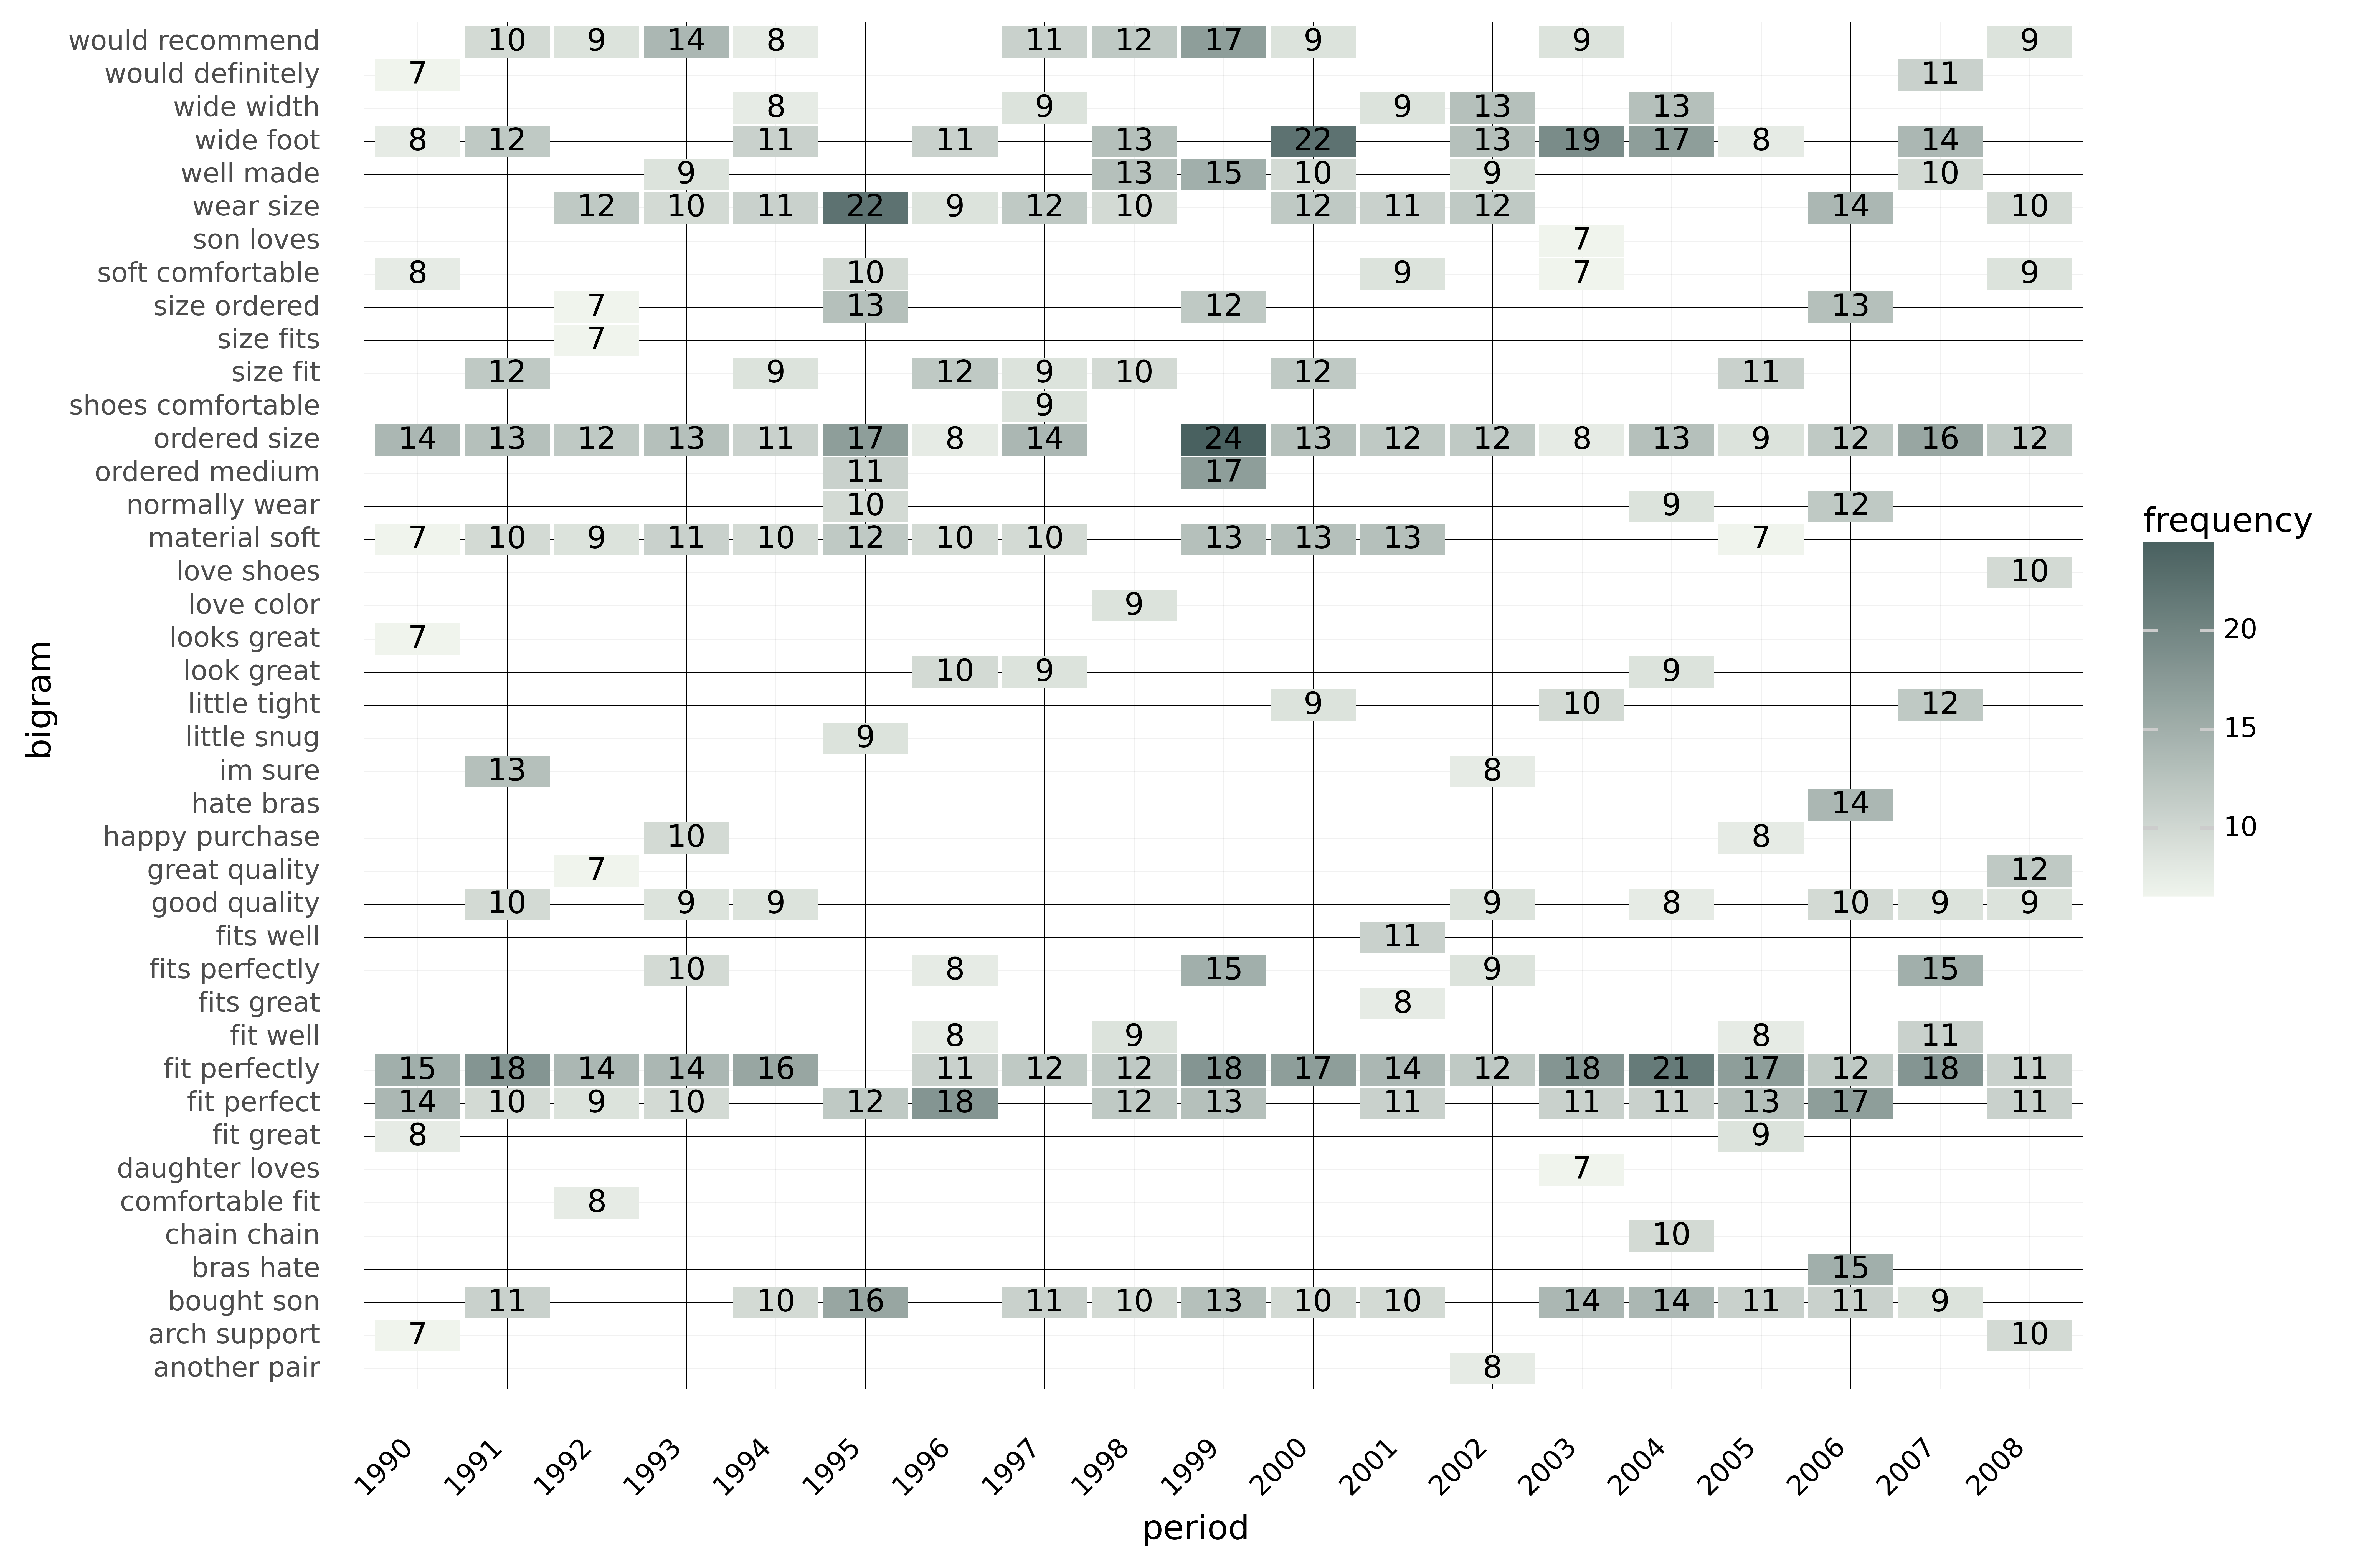

In [14]:
# Factors driving customer satisfaction

from arabica import cappuccino

cappuccino(text = data['text'],
           time = data['period'],
           date_format = 'us',                # Uses US-style date format to parse dates
           plot = 'heatmap',
           ngram = 2,                         # N-gram size, 1 = unigram, 2 = bigram
           time_freq = 'Y',                   # Aggregation period, 'M' = monthly, 'Y' = yearly
           max_words = 10,                    # Displays 8 most frequent unigrams for each period
           stopwords = ['english'],           # Remove English stopwords
           skip = None,                       # Remove additional unwanted strings
           numbers = True,                    # Remove numbers
           lower_case = True)                 # Lowercase text before cleaning and frequency analysis